In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os

## 파일 합치기

In [ ]:
# # 폴더 경로
# folder_path = '/content/drive/MyDrive/csv'

# # 파일 이름 순서대로 저장
# file_names = [
#     '화양동_final.csv',
#     '군자동_final.csv',
#     '능동_final.csv',
#     '구의1동_final.csv',
#     '구의2동_final.csv'
# ]

# # 빈 DataFrame 생성
# combined_df = pd.DataFrame()

# # 파일 이름 순서대로 각 CSV 파일을 읽고 데이터프레임으로 저장 후 병합
# for file_name in file_names:
#     file_path = os.path.join(folder_path, file_name)
#     if os.path.exists(file_path):
#         df = pd.read_csv(file_path)
#         combined_df = pd.concat([combined_df, df], ignore_index=True)
#     else:
#         print(f'{file_name}이 존재하지 않습니다.')

# # 결과 확인
# print(combined_df)

In [ ]:
# # 'url' 열을 기준으로 중복된 행 중 첫 번째 행만 남기고 나머지 제거
# deduplicated_df = combined_df.drop_duplicates(subset=['url'], keep='first')

# # 결과 확인
# print(deduplicated_df)

In [ ]:
# deduplicated_df = deduplicated_df[deduplicated_df['category'] != '테마카페']

## 수치화

In [23]:
deduplicated_df = pd.read_csv('/content/drive/MyDrive/csv/1)info_0509.csv')

In [24]:
# '제목'과 '리뷰' 열만 추출
new_df = deduplicated_df[['title', 'review_select']]

# 결과 확인
print(new_df)

              title                                      review_select
0          로니로티 건대점  {'음식이 맛있어요': 1192, '양이 많아요': 622, '가성비가 좋아요': ...
1               도우터  {'음식이 맛있어요': 752, '인테리어가 멋져요': 481, '친절해요': 28...
2        오코노미야키식당하나  {'음식이 맛있어요': 614, '친절해요': 324, '특별한 메뉴가 있어요': ...
3          화기애애 건대점  {'음식이 맛있어요': 832, '고기 질이 좋아요': 428, '친절해요': 39...
4            시옌 건대점  {'음식이 맛있어요': 236, '친절해요': 79, '단체모임 하기 좋아요': 5...
..              ...                                                ...
228  동대문엽기떡볶이 아차산역점  {'음식이 맛있어요': 246, '양이 많아요': 63, '친절해요': 53, '재...
229      김밥천국 구의2호점  {'음식이 맛있어요': 179, '가성비가 좋아요': 145, '혼밥하기 좋아요':...
230             소바쿠  {'음식이 맛있어요': 421, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...
231           찐족발보쌈  {'음식이 맛있어요': 147, '가성비가 좋아요': 53, '친절해요': 44, ...
232             산풀잎  {'커피가 맛있어요': 74, '음료가 맛있어요': 60, '특별한 메뉴가 있어요'...

[233 rows x 2 columns]


In [25]:
import ast

# 각 행의 'review_select' 열 값을 딕셔너리로 변환하고 key값을 추출하여 모은다.
all_keys = []
for index, row in new_df.iterrows():
    review_dict = ast.literal_eval(row['review_select'])
    keys = list(review_dict.keys())
    all_keys.extend(keys)

# 중복을 제거하여 unique한 key값을 얻는다.
unique_keys = set(all_keys)

# 결과 출력
print(unique_keys)

{'포장이 깔끔해요', '특별한 메뉴가 있어요', '룸이 잘 되어있어요', '혼술하기 좋아요', '음식이 빨리 나와요', '인테리어가 멋져요', '주차하기 편해요', '아늑해요', '반려동물과 가기 좋아요', '잡내가 적어요', '반찬이 잘 나와요', '코스요리가 알차요', '샐러드바가 잘 되어있어요', '양이 많아요', '선물하기 좋아요', '화장실이 깨끗해요', '매장이 넓어요', '향신료가 강하지 않아요', '단체모임 하기 좋아요', '술이 다양해요', '주문제작을 잘해줘요', '특별한 날 가기 좋아요', '파티하기 좋아요', '건강한 맛이에요', '재료가 신선해요', '음료가 맛있어요', '좌석이 편해요', '혼밥하기 좋아요', '비싼 만큼 가치있어요', '빵이 맛있어요', '음악이 좋아요', '메뉴 구성이 알차요', '환기가 잘 돼요', '커피가 맛있어요', '현지 맛에 가까워요', '매장이 청결해요', '직접 잘 구워줘요', '차가 맛있어요', '종류가 다양해요', '음식이 맛있어요', '가성비가 좋아요', '차분한 분위기에요', '고기 질이 좋아요', '아이와 가기 좋아요', '야외 공간이 멋져요', '집중하기 좋아요', '디저트가 맛있어요', '친절해요', '라이브공연이 훌륭해요', '컨셉이 독특해요', '대화하기 좋아요', '사진이 잘 나와요', '기본 안주가 좋아요', '뷰가 좋아요', '오래 머무르기 좋아요'}


In [26]:
# review_select 열의 문자열을 딕셔너리로 변환하는 함수
def parse_review_select(review_select_str):
    try:
        return ast.literal_eval(review_select_str)
    except ValueError:
        return {}

# review_select 열의 각 값을 딕셔너리로 변환
new_df['review_select'] = new_df['review_select'].apply(parse_review_select)

# 결과 확인
print(new_df['review_select'])

0      {'음식이 맛있어요': 1192, '양이 많아요': 622, '가성비가 좋아요': ...
1      {'음식이 맛있어요': 752, '인테리어가 멋져요': 481, '친절해요': 28...
2      {'음식이 맛있어요': 614, '친절해요': 324, '특별한 메뉴가 있어요': ...
3      {'음식이 맛있어요': 832, '고기 질이 좋아요': 428, '친절해요': 39...
4      {'음식이 맛있어요': 236, '친절해요': 79, '단체모임 하기 좋아요': 5...
                             ...                        
228    {'음식이 맛있어요': 246, '양이 많아요': 63, '친절해요': 53, '재...
229    {'음식이 맛있어요': 179, '가성비가 좋아요': 145, '혼밥하기 좋아요':...
230    {'음식이 맛있어요': 421, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...
231    {'음식이 맛있어요': 147, '가성비가 좋아요': 53, '친절해요': 44, ...
232    {'커피가 맛있어요': 74, '음료가 맛있어요': 60, '특별한 메뉴가 있어요'...
Name: review_select, Length: 233, dtype: object


<ipython-input-26-f97c362482e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['review_select'] = new_df['review_select'].apply(parse_review_select)


## 맛 재계산
- 음식이 맛있어요 대신 flavor_positive

In [ ]:
flavor = pd.read_csv('/content/drive/MyDrive/csv/flavor.csv')

import pandas as pd

# new_df에서 review_select 열이 있는지 확인
if 'review_select' in new_df.columns:
    # 각 행의 review_select 값을 순회하여 처리
    for index, row in new_df.iterrows():
        review_select_dict = row['review_select']
        if '음식이 맛있어요' in review_select_dict:
            # flavor.csv에서 동일한 행위치의 flavor_positive 값을 가져와서 해당 값을 review_select_dict에 대체
            flavor_positive_value = flavor.loc[index, 'flavor_positive']
            review_select_dict['음식이 맛있어요'] = flavor_positive_value
        # 변경된 review_select_dict를 해당 행의 'review_select' 열에 대입
        new_df.at[index, 'review_select'] = review_select_dict
else:
    print("review_select 열이 존재하지 않습니다.")


In [ ]:
print(new_df['review_select'])

0      {'음식이 맛있어요': 60, '양이 많아요': 622, '가성비가 좋아요': 56...
1      {'음식이 맛있어요': 97, '인테리어가 멋져요': 481, '친절해요': 286...
2      {'음식이 맛있어요': 89, '친절해요': 324, '특별한 메뉴가 있어요': 2...
3      {'음식이 맛있어요': 85, '고기 질이 좋아요': 428, '친절해요': 398...
4      {'음식이 맛있어요': 54, '친절해요': 79, '단체모임 하기 좋아요': 52...
                             ...                        
266    {'음식이 맛있어요': 15, '가성비가 좋아요': 145, '혼밥하기 좋아요': ...
267    {'음식이 맛있어요': 105, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...
268    {'음식이 맛있어요': 51, '가성비가 좋아요': 53, '친절해요': 44, '...
269    {'신선해요': 446, '친절해요': 263, '부위가 다양해요': 108, '포...
270    {'커피가 맛있어요': 74, '음료가 맛있어요': 60, '특별한 메뉴가 있어요'...
Name: review_select, Length: 271, dtype: object


## 각 항목 계산

In [27]:
# 변환할 항목들과 각 항목에 해당하는 리뷰를 담은 딕셔너리 생성
criteria = {
    '맛': ['음식이 맛있어요', '재료가 신선해요', '양이 많아요', '특별한 메뉴가 있어요', '건강한 맛이에요',
          '반찬이 잘 나와요', '메뉴 구성이 알차요', '기본 안주가 좋아요', '술이 다양해요', '음료가 맛있어요',
          '커피가 맛있어요', '디저트가 맛있어요', '코스요리가 알차요', '고기 질이 좋아요', '현지 맛에 가까워요',
          '향신료가 강하지 않아요', '잡내가 적어요', '특색 있는 제품이 많아요', '차가 맛있어요', '부위가 다양해요',
          '품질이 좋아요', '종류가 다양해요', '신선해요', '빵이 맛있어요'],
    '분위기': ['인테리어가 멋져요', '매장이 넓어요', '혼밥하기 좋아요', '단체모임 하기 좋아요', '뷰가 좋아요',
            '아늑해요', '야외 공간이 멋져요', '컨셉이 독특해요', '차분한 분위기에요', '대화하기 좋아요',
            '사진이 잘 나와요', '음악이 좋아요', '집중하기 좋아요', '혼술하기 좋아요', '라이브공연이 훌륭해요',
            '시설이 깔끔해요', '공간이 넓어요', '동물을 배려한 환경이에요', '분위기가 편안해요', '파티하기 좋아요'],
    '서비스': ['친절해요', '매장이 청결해요', '화장실이 깨끗해요', '주차하기 편해요', '특별한 날 가기 좋아요',
            '룸이 잘 되어있어요', '반려동물과 가기 좋아요', '아이와 가기 좋아요', '오래 머무르기 좋아요',
            '음식이 빨리 나와요', '좌석이 편해요', '직접 잘 구워줘요', '샐러드바가 잘 되어있어요', '환기가 잘 돼요',
            '포장이 깔끔해요', '주문제작을 잘해줘요', '선물하기 좋아요', '원산지 표시가 명확해요'],
    '가성비_R': ['가성비가 좋아요', '가격이 합리적이에요'],
    '가성비_F': ['비싼 만큼 가치있어요']
}

# 각 항목에 대한 리뷰 개수를 계산하는 함수
def count_reviews(row, criteria):
    counts = {}
    for criterion, reviews in criteria.items():
        count = 0
        for review in reviews:
            if review in row['review_select']:
                count += row['review_select'][review]
        counts[criterion] = count
    return pd.Series(counts)

# 데이터프레임에 함수 적용하여 새로운 열 생성
new_df[list(criteria.keys())] = new_df.apply(lambda row: count_reviews(row, criteria), axis=1)

# 결과 확인
print(new_df)

              title                                      review_select     맛  \
0          로니로티 건대점  {'음식이 맛있어요': 1192, '양이 많아요': 622, '가성비가 좋아요': ...  2188   
1               도우터  {'음식이 맛있어요': 752, '인테리어가 멋져요': 481, '친절해요': 28...  1323   
2        오코노미야키식당하나  {'음식이 맛있어요': 614, '친절해요': 324, '특별한 메뉴가 있어요': ...  1256   
3          화기애애 건대점  {'음식이 맛있어요': 832, '고기 질이 좋아요': 428, '친절해요': 39...  1705   
4            시옌 건대점  {'음식이 맛있어요': 236, '친절해요': 79, '단체모임 하기 좋아요': 5...   340   
..              ...                                                ...   ...   
228  동대문엽기떡볶이 아차산역점  {'음식이 맛있어요': 246, '양이 많아요': 63, '친절해요': 53, '재...   372   
229      김밥천국 구의2호점  {'음식이 맛있어요': 179, '가성비가 좋아요': 145, '혼밥하기 좋아요':...   267   
230             소바쿠  {'음식이 맛있어요': 421, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...   770   
231           찐족발보쌈  {'음식이 맛있어요': 147, '가성비가 좋아요': 53, '친절해요': 44, ...   236   
232             산풀잎  {'커피가 맛있어요': 74, '음료가 맛있어요': 60, '특별한 메뉴가 있어요'...   198   

     분위기  서비스  가성비_R  가성비_F  
0    770 

<ipython-input-27-4d075cc53466>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[list(criteria.keys())] = new_df.apply(lambda row: count_reviews(row, criteria), axis=1)
<ipython-input-27-4d075cc53466>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[list(criteria.keys())] = new_df.apply(lambda row: count_reviews(row, criteria), axis=1)
<ipython-input-27-4d075cc53466>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [28]:
# 각 항목에 대한 열의 평균 계산
average_ratings = {}
for criterion in criteria.keys():
    average_rating = new_df[criterion].mean()
    average_ratings[criterion] = average_rating
    print(criterion, average_ratings[criterion])

# 각 행에 대해 맛/분위기/서비스 값과 해당 항목의 평균 값의 차이를 계산하여 새로운 열에 추가
for criterion in criteria.keys():
    new_df[f'{criterion}_difference'] = new_df[criterion] - average_ratings[criterion]
    new_df[f'{criterion}_difference_percentage'] = (new_df[f'{criterion}_difference'] / average_ratings[criterion]) * 100

# 결과 확인
print(new_df)

맛 745.6909871244635
분위기 277.6738197424893
서비스 323.73390557939916
가성비_R 117.95708154506438
가성비_F 0.9742489270386266
              title                                      review_select     맛  \
0          로니로티 건대점  {'음식이 맛있어요': 1192, '양이 많아요': 622, '가성비가 좋아요': ...  2188   
1               도우터  {'음식이 맛있어요': 752, '인테리어가 멋져요': 481, '친절해요': 28...  1323   
2        오코노미야키식당하나  {'음식이 맛있어요': 614, '친절해요': 324, '특별한 메뉴가 있어요': ...  1256   
3          화기애애 건대점  {'음식이 맛있어요': 832, '고기 질이 좋아요': 428, '친절해요': 39...  1705   
4            시옌 건대점  {'음식이 맛있어요': 236, '친절해요': 79, '단체모임 하기 좋아요': 5...   340   
..              ...                                                ...   ...   
228  동대문엽기떡볶이 아차산역점  {'음식이 맛있어요': 246, '양이 많아요': 63, '친절해요': 53, '재...   372   
229      김밥천국 구의2호점  {'음식이 맛있어요': 179, '가성비가 좋아요': 145, '혼밥하기 좋아요':...   267   
230             소바쿠  {'음식이 맛있어요': 421, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...   770   
231           찐족발보쌈  {'음식이 맛있어요': 147, '가성비가 좋아요': 53, '친절해요': 44, ...   236   
232  

<ipython-input-28-2bfe24abd37d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[f'{criterion}_difference'] = new_df[criterion] - average_ratings[criterion]
<ipython-input-28-2bfe24abd37d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[f'{criterion}_difference_percentage'] = (new_df[f'{criterion}_difference'] / average_ratings[criterion]) * 100
<ipython-input-28-2bfe24abd37d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [29]:
# 맛, 분위기, 서비스 비율을 비교하여 M, F, S 조합을 할당하는 함수 정의
def assign_category(row):
    ratios = {'F': row['맛_difference_percentage'], 'M': row['분위기_difference_percentage'], 'S': row['서비스_difference_percentage']}
    sorted_ratios = sorted(ratios.items(), key=lambda x: x[1], reverse=True)
    return ''.join([ratio[0] for ratio in sorted_ratios])

# 새로운 열 추가
new_df['BTI'] = new_df.apply(assign_category, axis=1)

# 결과 확인
print(new_df)


              title                                      review_select     맛  \
0          로니로티 건대점  {'음식이 맛있어요': 1192, '양이 많아요': 622, '가성비가 좋아요': ...  2188   
1               도우터  {'음식이 맛있어요': 752, '인테리어가 멋져요': 481, '친절해요': 28...  1323   
2        오코노미야키식당하나  {'음식이 맛있어요': 614, '친절해요': 324, '특별한 메뉴가 있어요': ...  1256   
3          화기애애 건대점  {'음식이 맛있어요': 832, '고기 질이 좋아요': 428, '친절해요': 39...  1705   
4            시옌 건대점  {'음식이 맛있어요': 236, '친절해요': 79, '단체모임 하기 좋아요': 5...   340   
..              ...                                                ...   ...   
228  동대문엽기떡볶이 아차산역점  {'음식이 맛있어요': 246, '양이 많아요': 63, '친절해요': 53, '재...   372   
229      김밥천국 구의2호점  {'음식이 맛있어요': 179, '가성비가 좋아요': 145, '혼밥하기 좋아요':...   267   
230             소바쿠  {'음식이 맛있어요': 421, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...   770   
231           찐족발보쌈  {'음식이 맛있어요': 147, '가성비가 좋아요': 53, '친절해요': 44, ...   236   
232             산풀잎  {'커피가 맛있어요': 74, '음료가 맛있어요': 60, '특별한 메뉴가 있어요'...   198   

     분위기  서비스  가성비_R  가성비_F  맛_differen

## 가성비 재계산

In [30]:
flex = pd.read_csv('/content/drive/MyDrive/csv/flex_0509.csv')

In [31]:
# 필요한 열 선택
flex_selected = flex[['flex_count', 'flex_negative_count', 'flex_positive_count']]

# new_df에 flex_selected 열 추가
new_df = pd.concat([new_df, flex_selected], axis=1)

# 결과 확인
print(new_df)

              title                                      review_select     맛  \
0          로니로티 건대점  {'음식이 맛있어요': 1192, '양이 많아요': 622, '가성비가 좋아요': ...  2188   
1               도우터  {'음식이 맛있어요': 752, '인테리어가 멋져요': 481, '친절해요': 28...  1323   
2        오코노미야키식당하나  {'음식이 맛있어요': 614, '친절해요': 324, '특별한 메뉴가 있어요': ...  1256   
3          화기애애 건대점  {'음식이 맛있어요': 832, '고기 질이 좋아요': 428, '친절해요': 39...  1705   
4            시옌 건대점  {'음식이 맛있어요': 236, '친절해요': 79, '단체모임 하기 좋아요': 5...   340   
..              ...                                                ...   ...   
228  동대문엽기떡볶이 아차산역점  {'음식이 맛있어요': 246, '양이 많아요': 63, '친절해요': 53, '재...   372   
229      김밥천국 구의2호점  {'음식이 맛있어요': 179, '가성비가 좋아요': 145, '혼밥하기 좋아요':...   267   
230             소바쿠  {'음식이 맛있어요': 421, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...   770   
231           찐족발보쌈  {'음식이 맛있어요': 147, '가성비가 좋아요': 53, '친절해요': 44, ...   236   
232             산풀잎  {'커피가 맛있어요': 74, '음료가 맛있어요': 60, '특별한 메뉴가 있어요'...   198   

     분위기  서비스  가성비_R  가성비_F  맛_differen

In [32]:
# 가성비_R 열에 가성비_R값과 flex_positive_count을 더하여 업데이트
new_df['가성비_R'] = new_df['가성비_R'] + new_df['flex_positive_count']

# 가성비_F 열에 가성비_F값과 flex_negative_count을 더하여 업데이트
new_df['가성비_F'] = new_df['가성비_F'] + new_df['flex_negative_count']

# flex_count 열에 가성비_R과 가성비_F의 합을 더하여 업데이트
new_df['flex_count'] = new_df['가성비_R'] + new_df['가성비_F']

# 결과 확인
print(new_df)

              title                                      review_select     맛  \
0          로니로티 건대점  {'음식이 맛있어요': 1192, '양이 많아요': 622, '가성비가 좋아요': ...  2188   
1               도우터  {'음식이 맛있어요': 752, '인테리어가 멋져요': 481, '친절해요': 28...  1323   
2        오코노미야키식당하나  {'음식이 맛있어요': 614, '친절해요': 324, '특별한 메뉴가 있어요': ...  1256   
3          화기애애 건대점  {'음식이 맛있어요': 832, '고기 질이 좋아요': 428, '친절해요': 39...  1705   
4            시옌 건대점  {'음식이 맛있어요': 236, '친절해요': 79, '단체모임 하기 좋아요': 5...   340   
..              ...                                                ...   ...   
228  동대문엽기떡볶이 아차산역점  {'음식이 맛있어요': 246, '양이 많아요': 63, '친절해요': 53, '재...   372   
229      김밥천국 구의2호점  {'음식이 맛있어요': 179, '가성비가 좋아요': 145, '혼밥하기 좋아요':...   267   
230             소바쿠  {'음식이 맛있어요': 421, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...   770   
231           찐족발보쌈  {'음식이 맛있어요': 147, '가성비가 좋아요': 53, '친절해요': 44, ...   236   
232             산풀잎  {'커피가 맛있어요': 74, '음료가 맛있어요': 60, '특별한 메뉴가 있어요'...   198   

     분위기  서비스  가성비_R  가성비_F  맛_differen

In [33]:
# 가성비_R 및 가성비_F 열의 평균 계산
average_R = new_df['가성비_R'].mean()
average_F = new_df['가성비_F'].mean()

# 결과 출력
print("가성비_R의 평균:", average_R)
print("가성비_F의 평균:", average_F)

가성비_R의 평균: 122.21459227467811
가성비_F의 평균: 1.3476394849785407


In [34]:
# 가성비_R_difference 계산
new_df['가성비_R_difference'] = new_df['가성비_R'] - average_R

# 가성비_R_difference_percentage 계산
new_df['가성비_R_difference_percentage'] = (new_df['가성비_R_difference'] / average_R) * 100

# 가성비_F_difference 계산
new_df['가성비_F_difference'] = new_df['가성비_F'] - average_F

# 가성비_F_difference_percentage 계산
new_df['가성비_F_difference_percentage'] = (new_df['가성비_F_difference'] / average_F) * 100

# 결과 확인
print(new_df)

              title                                      review_select     맛  \
0          로니로티 건대점  {'음식이 맛있어요': 1192, '양이 많아요': 622, '가성비가 좋아요': ...  2188   
1               도우터  {'음식이 맛있어요': 752, '인테리어가 멋져요': 481, '친절해요': 28...  1323   
2        오코노미야키식당하나  {'음식이 맛있어요': 614, '친절해요': 324, '특별한 메뉴가 있어요': ...  1256   
3          화기애애 건대점  {'음식이 맛있어요': 832, '고기 질이 좋아요': 428, '친절해요': 39...  1705   
4            시옌 건대점  {'음식이 맛있어요': 236, '친절해요': 79, '단체모임 하기 좋아요': 5...   340   
..              ...                                                ...   ...   
228  동대문엽기떡볶이 아차산역점  {'음식이 맛있어요': 246, '양이 많아요': 63, '친절해요': 53, '재...   372   
229      김밥천국 구의2호점  {'음식이 맛있어요': 179, '가성비가 좋아요': 145, '혼밥하기 좋아요':...   267   
230             소바쿠  {'음식이 맛있어요': 421, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...   770   
231           찐족발보쌈  {'음식이 맛있어요': 147, '가성비가 좋아요': 53, '친절해요': 44, ...   236   
232             산풀잎  {'커피가 맛있어요': 74, '음료가 맛있어요': 60, '특별한 메뉴가 있어요'...   198   

     분위기  서비스  가성비_R  가성비_F  맛_differen

In [35]:
# 가성비 열 생성
new_df['가성비'] = ''
new_df.loc[new_df['가성비_R_difference_percentage'] > new_df['가성비_F_difference_percentage'], '가성비'] = 'R'
new_df.loc[new_df['가성비_R_difference_percentage'] <= new_df['가성비_F_difference_percentage'], '가성비'] = 'F'

# 결과 확인
print(new_df)

              title                                      review_select     맛  \
0          로니로티 건대점  {'음식이 맛있어요': 1192, '양이 많아요': 622, '가성비가 좋아요': ...  2188   
1               도우터  {'음식이 맛있어요': 752, '인테리어가 멋져요': 481, '친절해요': 28...  1323   
2        오코노미야키식당하나  {'음식이 맛있어요': 614, '친절해요': 324, '특별한 메뉴가 있어요': ...  1256   
3          화기애애 건대점  {'음식이 맛있어요': 832, '고기 질이 좋아요': 428, '친절해요': 39...  1705   
4            시옌 건대점  {'음식이 맛있어요': 236, '친절해요': 79, '단체모임 하기 좋아요': 5...   340   
..              ...                                                ...   ...   
228  동대문엽기떡볶이 아차산역점  {'음식이 맛있어요': 246, '양이 많아요': 63, '친절해요': 53, '재...   372   
229      김밥천국 구의2호점  {'음식이 맛있어요': 179, '가성비가 좋아요': 145, '혼밥하기 좋아요':...   267   
230             소바쿠  {'음식이 맛있어요': 421, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...   770   
231           찐족발보쌈  {'음식이 맛있어요': 147, '가성비가 좋아요': 53, '친절해요': 44, ...   236   
232             산풀잎  {'커피가 맛있어요': 74, '음료가 맛있어요': 60, '특별한 메뉴가 있어요'...   198   

     분위기  서비스  가성비_R  가성비_F  맛_differen

## 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


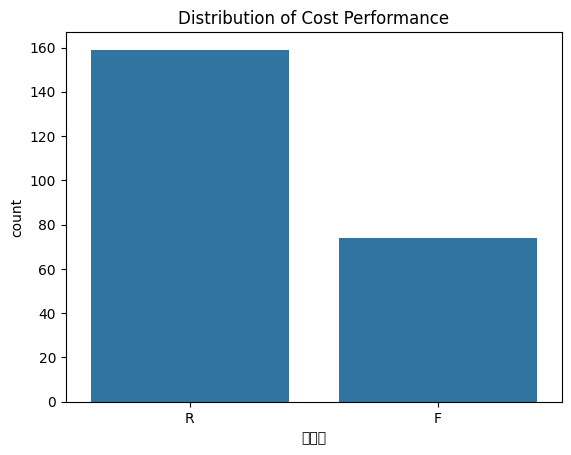

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 가성비 열 값 카운트
sns.countplot(data=new_df, x='가성비')

# 그래프 제목 추가
plt.title('Distribution of Cost Performance')

# 그래프 출력
plt.show()

In [37]:
# BTI 열과 가성비 열을 합친 새로운 열 생성
new_df['먹BTI'] = new_df['BTI'] + '-' + new_df['가성비']

# 결과 확인
print(new_df)

              title                                      review_select     맛  \
0          로니로티 건대점  {'음식이 맛있어요': 1192, '양이 많아요': 622, '가성비가 좋아요': ...  2188   
1               도우터  {'음식이 맛있어요': 752, '인테리어가 멋져요': 481, '친절해요': 28...  1323   
2        오코노미야키식당하나  {'음식이 맛있어요': 614, '친절해요': 324, '특별한 메뉴가 있어요': ...  1256   
3          화기애애 건대점  {'음식이 맛있어요': 832, '고기 질이 좋아요': 428, '친절해요': 39...  1705   
4            시옌 건대점  {'음식이 맛있어요': 236, '친절해요': 79, '단체모임 하기 좋아요': 5...   340   
..              ...                                                ...   ...   
228  동대문엽기떡볶이 아차산역점  {'음식이 맛있어요': 246, '양이 많아요': 63, '친절해요': 53, '재...   372   
229      김밥천국 구의2호점  {'음식이 맛있어요': 179, '가성비가 좋아요': 145, '혼밥하기 좋아요':...   267   
230             소바쿠  {'음식이 맛있어요': 421, '혼밥하기 좋아요': 170, '특별한 메뉴가 있어...   770   
231           찐족발보쌈  {'음식이 맛있어요': 147, '가성비가 좋아요': 53, '친절해요': 44, ...   236   
232             산풀잎  {'커피가 맛있어요': 74, '음료가 맛있어요': 60, '특별한 메뉴가 있어요'...   198   

     분위기  서비스  가성비_R  가성비_F  맛_differen

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47673 (\N{HANGUL SYLLABLE MEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


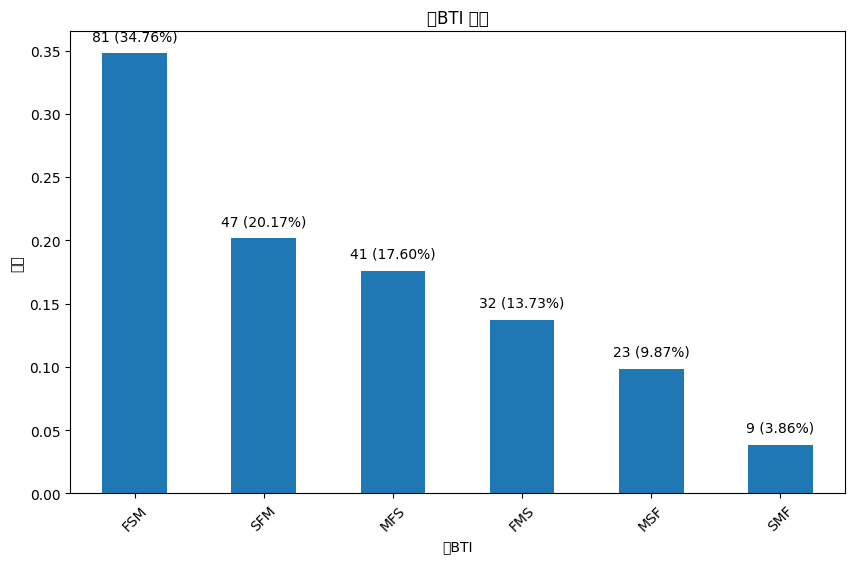

In [38]:
import matplotlib.pyplot as plt

# 먹BTI 열 값의 각 항목별 빈도수 계산
bti_counts = new_df['BTI'].value_counts()

# 먹BTI 값의 비율 계산
bti_ratios = bti_counts / bti_counts.sum()

# 비율을 시각화하여 표시
plt.figure(figsize=(10, 6))
bti_plot = bti_ratios.plot(kind='bar')
plt.title('먹BTI 비율')
plt.xlabel('먹BTI')
plt.ylabel('비율')
plt.xticks(rotation=45)

# 막대 위에 수치 표시
for i in range(len(bti_counts)):
    plt.text(i, bti_ratios[i] + 0.01, f'{bti_counts[i]} ({bti_ratios[i]*100:.2f}%)', ha='center')

plt.show()


## 파일 저장

In [39]:
print(new_df.columns)

Index(['title', 'review_select', '맛', '분위기', '서비스', '가성비_R', '가성비_F',
       '맛_difference', '맛_difference_percentage', '분위기_difference',
       '분위기_difference_percentage', '서비스_difference',
       '서비스_difference_percentage', '가성비_R_difference',
       '가성비_R_difference_percentage', '가성비_F_difference',
       '가성비_F_difference_percentage', 'BTI', 'flex_count',
       'flex_negative_count', 'flex_positive_count', '가성비', '먹BTI'],
      dtype='object')


In [40]:
# 지정된 열 삭제
new_df.drop(columns=['review_select', 'flex_count', 'flex_negative_count', 'flex_positive_count'], inplace=True)

In [41]:
new_df

,title,맛,분위기,서비스,가성비_R,가성비_F,맛_difference,맛_difference_percentage,분위기_difference,분위기_difference_percentage,서비스_difference,서비스_difference_percentage,가성비_R_difference,가성비_R_difference_percentage,가성비_F_difference,가성비_F_difference_percentage,BTI,가성비,먹BTI
0,로니로티 건대점,2188,770,663,586,0,1442.309013,193.419129,492.32618,177.303781,339.266094,104.797826,463.785408,379.484478,-1.347639,-100.000000,FMS,R,FMS-R
1,도우터,1323,919,634,48,1,577.309013,77.419336,641.32618,230.963863,310.266094,95.839852,-74.214592,-60.724821,-0.347639,-25.796178,MSF,F,MSF-F
2,오코노미야키식당하나,1256,121,472,125,3,510.309013,68.434381,-156.67382,-56.423692,148.266094,45.798754,2.785408,2.279112,1.652361,122.611465,FSM,F,FSM-F
3,화기애애 건대점,1705,537,626,355,1,959.309013,128.646990,259.32618,93.392377,302.266094,93.368686,232.785408,190.472679,-0.347639,-25.796178,FMS,R,FMS-R
4,시옌 건대점,340,126,136,19,3,-405.690987,-54.404706,-151.67382,-54.623018,-187.733906,-57.990190,-103.214592,-84.453575,1.652361,122.611465,FMS,F,FMS-F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,동대문엽기떡볶이 아차산역점,372,25,79,32,0,-373.690987,-50.113384,-252.67382,-90.996630,-244.733906,-75.597242,-90.214592,-73.816547,-1.347639,-100.000000,FSM,R,FSM-R
229,김밥천국 구의2호점,267,115,102,146,0,-478.690987,-64.194284,-162.67382,-58.584500,-221.733906,-68.492642,23.785408,19.462003,-1.347639,-100.000000,MFS,R,MFS-R
230,소바쿠,770,228,161,116,0,24.309013,3.259931,-49.67382,-17.889270,-162.733906,-50.267798,-6.214592,-5.084984,-1.347639,-100.000000,FMS,R,FMS-R
231,찐족발보쌈,236,64,87,60,0,-509.690987,-68.351502,-213.67382,-76.951374,-236.733906,-73.126077,-62.214592,-50.906026,-1.347639,-100.000000,FSM,R,FSM-R


In [42]:
new_df.to_csv('/content/drive/MyDrive/csv/2)bti_0509.csv', index=False)